# Exploración de Datos y Detección de Sesgos

**Objetivo:**  
En este notebook, exploraremos un conjunto de datos médicos para identificar posibles sesgos que puedan afectar el desempeño de modelos de aprendizaje automático en salud. Aprenderemos a cargar datos, realizar análisis exploratorio y visualizar distribuciones para detectar discrepancias entre diferentes grupos demográficos.

**Requisitos previos:**  
No se asume experiencia previa en programación. Se proporcionarán explicaciones detalladas y comentarios en el código.

## 1. Importar Librerías Necesarias

Primero, importaremos las librerías que utilizaremos para nuestro análisis:

- `pandas` para manipulación de datos.
- `numpy` para operaciones numéricas.
- `matplotlib` y `seaborn` para visualización de datos.

In [ ]:
# Instalación de paquetes necesarios (ejecutar si es necesario)
!pip install pandas numpy matplotlib seaborn statsmodels

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilos de los gráficos
%matplotlib inline
sns.set(style="whitegrid")

## 2. Cargar el Conjunto de Datos

Utilizaremos el conjunto de datos **"Heart Disease"** disponible públicamente. Este dataset contiene información de pacientes y si presentan o no enfermedad cardíaca.

**Descripción del Conjunto de Datos:**

- **age**: Edad del paciente en años.
- **sex**: Género del paciente (1 = hombre; 0 = mujer).
- **cp**: Tipo de dolor en el pecho (4 valores).
- **trestbps**: Presión arterial en reposo (mm Hg).
- **chol**: Colesterol sérico en mg/dl.
- **fbs**: Azúcar en sangre en ayunas > 120 mg/dl (1 = verdadero; 0 = falso).
- **restecg**: Resultados electrocardiográficos en reposo (valores 0,1,2).
- **thalach**: Frecuencia cardíaca máxima alcanzada.
- **exang**: Angina inducida por ejercicio (1 = sí; 0 = no).
- **oldpeak**: Depresión ST inducida por el ejercicio relativo al reposo.
- **slope**: Pendiente del segmento ST de ejercicio pico.
- **ca**: Número de vasos principales coloreados por fluoroscopia (0-3).
- **thal**: Talasemia (3 = normal; 6 = defecto fijo; 7 = defecto reversible).
- **target**: Diagnóstico de enfermedad cardíaca (1 = presencia; 0 = ausencia).

In [12]:
# Cargar el conjunto de datos desde una URL
url = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
data = pd.read_csv(url)

# Mostrar las primeras filas del conjunto de datos
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Exploración Inicial de los Datos

### 3.1. Tamaño y Tipo de Datos

Comprobaremos el tamaño del conjunto de datos y los tipos de cada columna.

In [13]:
# Tamaño del conjunto de datos
print(f"El conjunto de datos tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

# Tipos de datos
data.info()

El conjunto de datos tiene 303 filas y 14 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 3.2. Estadísticas Descriptivas

Obtenemos estadísticas básicas para variables numéricas.

In [14]:
# Estadísticas descriptivas
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 4. Análisis Demográfico: Distribución por Género y Edad

### 4.1. Distribución de Género

Verificamos la distribución de pacientes por género.

sex
1    207
0     96
Name: count, dtype: int64


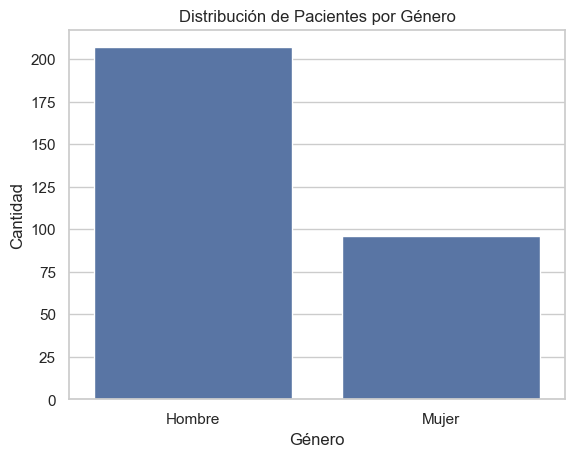

In [15]:
# Contar el número de pacientes por género
gender_counts = data['sex'].value_counts()
print(gender_counts)

# Renombrar categorías para mayor claridad
data['sex'] = data['sex'].map({0: 'Mujer', 1: 'Hombre'})

# Graficar la distribución
sns.countplot(x='sex', data=data)
plt.title('Distribución de Pacientes por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

**Observación:** Si hay una desproporción significativa entre hombres y mujeres, esto podría introducir un sesgo en nuestros modelos.

### 4.2. Distribución de Edad

Analizamos la distribución de la edad en el conjunto de datos.

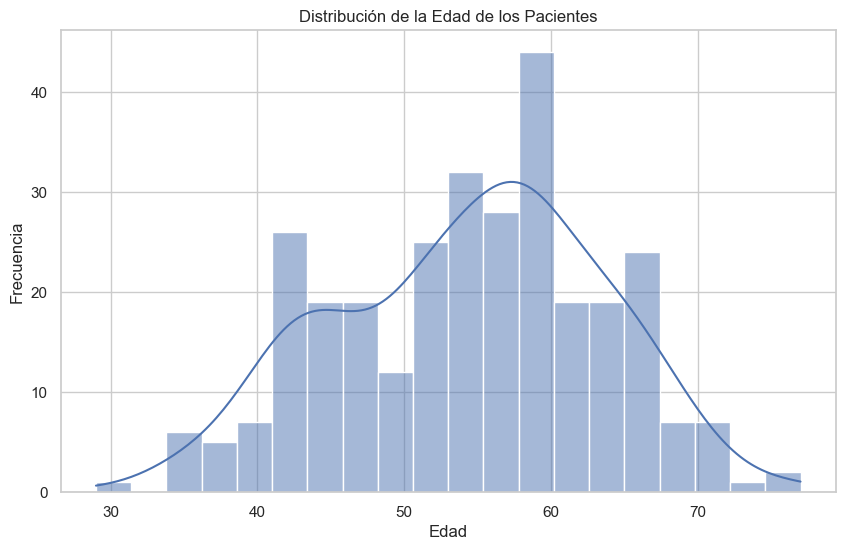

In [16]:
# Histograma de la edad
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribución de la Edad de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## 5. Análisis de Enfermedad Cardíaca por Género

Investigamos si existe diferencia en la prevalencia de enfermedad cardíaca entre hombres y mujeres.

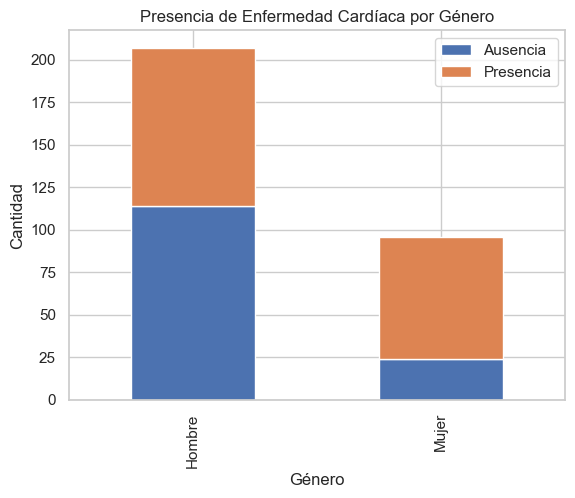

In [17]:
# Conteo de enfermedad cardíaca por género
heart_disease_by_gender = data.groupby('sex')['target'].value_counts().unstack()
heart_disease_by_gender

# Gráfico de barras apiladas
heart_disease_by_gender.plot(kind='bar', stacked=True)
plt.title('Presencia de Enfermedad Cardíaca por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(['Ausencia', 'Presencia'])
plt.show()

**Observación:** Las diferencias en la prevalencia pueden indicar la necesidad de modelos diferenciados o ajustar los existentes.

## 6. Análisis de Variables Clínicas por Género

### 6.1. Colesterol por Género

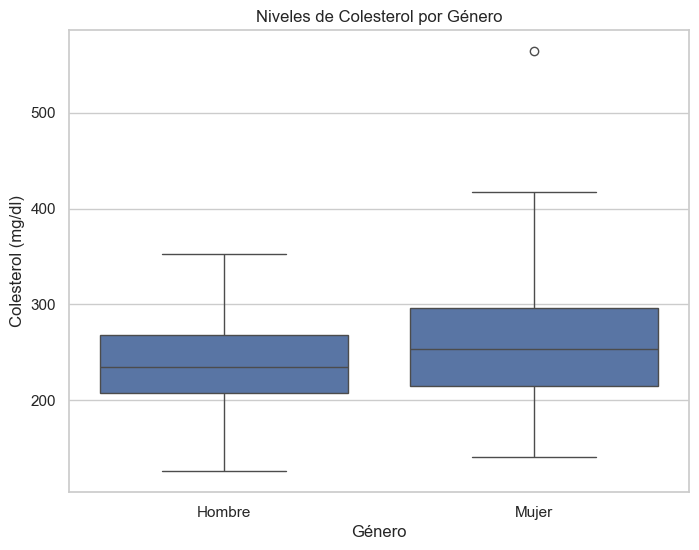

In [18]:
# Boxplot de colesterol por género
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='chol', data=data)
plt.title('Niveles de Colesterol por Género')
plt.xlabel('Género')
plt.ylabel('Colesterol (mg/dl)')
plt.show()

### 6.2. Frecuencia Cardíaca Máxima por Género

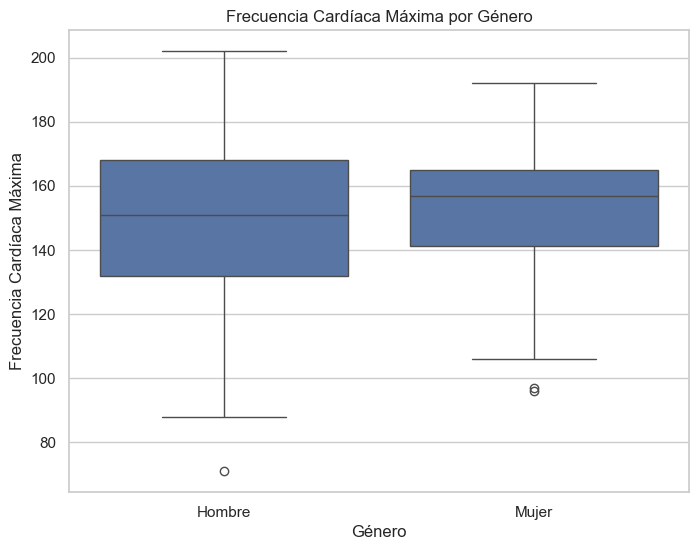

In [19]:
# Boxplot de frecuencia cardíaca máxima por género
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='thalach', data=data)
plt.title('Frecuencia Cardíaca Máxima por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia Cardíaca Máxima')
plt.show()

## 7. Detección de Sesgos Potenciales

### 7.1. Sesgo de Representación

- **Género:** ¿Hay equilibrio entre hombres y mujeres?
  - Síntomas y signos clínicos pueden manifestarse de manera diferente.
- **Edad:** ¿El rango de edades es representativo de la población general?

### 7.2. Sesgo en Variables Clínicas

- Las diferencias significativas en variables como colesterol o frecuencia cardíaca máxima entre géneros pueden afectar el desempeño de los modelos.

## 8. Conclusiones y Reflexiones

- **Importancia de la Exploración de Datos:**
  - Identificar desequilibrios que pueden introducir sesgos.
- **Implicaciones para Modelos de Aprendizaje Automático:**
  - Un modelo entrenado en datos sesgados puede no generalizar bien a poblaciones subrepresentadas.
- **Acciones a Tomar:**
  - Considerar técnicas de balanceo de datos.
  - Evaluar modelos por separado en subgrupos demográficos.

In [ ]:
## 9. Recursos Adicionales <a name="10"></a>

- **Guía sobre Equidad y Sesgos en IA:** [Fairness in Machine Learning](https://fairmlbook.org/)